In [1]:
# importing important modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the dataset
market = pd.read_excel("Supermarket_Sales.xlsx")

In [3]:
# showing the first top five rows
market.head()

,RowID,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,...,Date,Time,Payment,cost_of_goods_sold,gross margin percentage,gross income,Rating,Year in City,Age,ProdID
0,0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,...,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,8,0-17,P001
1,1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,...,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,4,18-25,P002
2,2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,...,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,6,0-17,P003
3,3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,...,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,3,45-50,P001
4,4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,...,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,1,55+,P004


In [4]:
# information about the dataset
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   RowID                    1000 non-null   int64         
 1   Invoice ID               1000 non-null   object        
 2   Branch                   1000 non-null   object        
 3   City                     1000 non-null   object        
 4   Customer type            1000 non-null   object        
 5   Gender                   1000 non-null   object        
 6   Product line             1000 non-null   object        
 7   Unit price               1000 non-null   float64       
 8   Quantity                 1000 non-null   int64         
 9   Tax 5%                   1000 non-null   float64       
 10  Total                    1000 non-null   float64       
 11  Date                     1000 non-null   datetime64[ns]
 12  Time                     1000 non-n

In [5]:
market.duplicated().sum()

0

#### Q1: What is the distribution of Male to Female customers? Give answers in % terms

In [6]:
gender_dist = market.Gender.value_counts(normalize=True).mul(100).astype(str) + '%'
gender_dist

Female    50.1%
Male      49.9%
Name: Gender, dtype: object

Observation: Female Customer has the highest percentage of 50.1%

#### Q2: What is the age distribution of customers? Consider drawing a histogram to answer the question

In [7]:
market.Age.value_counts()

45-50    156
55+      148
36-45    147
18-25    146
51-55    141
0-17     133
26-35    129
Name: Age, dtype: int64

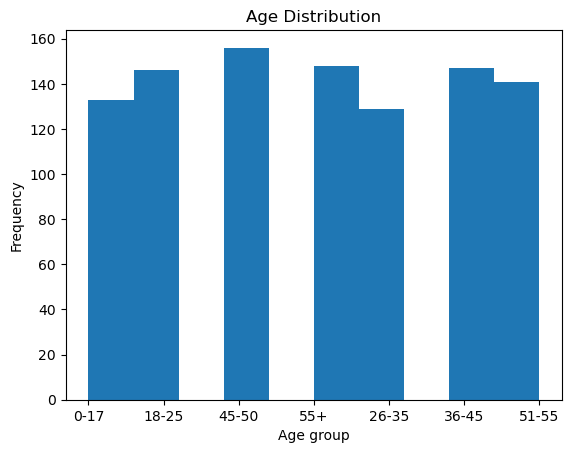

In [8]:
plt.hist(market.Age)
plt.xlabel('Age group')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show();

#### Q3: How many customers are considered Members (i.e., they use a Loyalty card while shopping) versus Normal customers

In [9]:
market['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

Observation: 501 customers were considered members

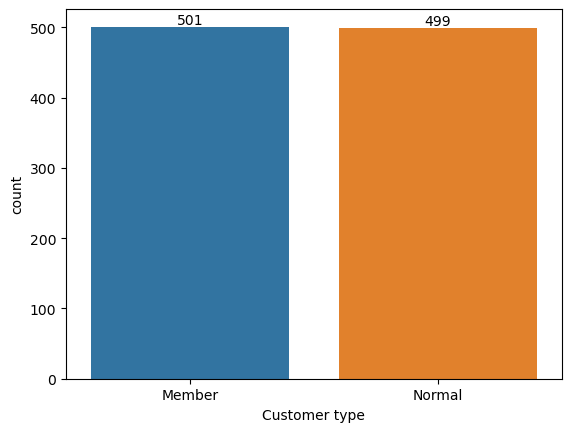

In [10]:
ax = sns.countplot(x='Customer type', data=market)
ax.bar_label(ax.containers[0]);

#### Q4: What is the most common method of payment to the supermarket? Which type of customers use this method the most – describe this?

In [11]:
market.Payment.value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

Observation: Ewallet is the most common method of payment to the supermarket

In [12]:
Ewallet_cust = market[market['Payment']== 'Ewallet']

In [29]:
# to get the type of customer that used ewallet the most
Ewallet_cust['Customer type'].value_counts()

Normal    184
Member    161
Name: Customer type, dtype: int64

0bservation: Normal are the customer type that used Ewallet the most

#### Q5: Which product generates the most sales in the supermarket?

In [14]:
# to get the most sales, we need to create a new column called sales
market['Sales']=market['cost_of_goods_sold'] + market['gross income']

In [15]:
market.head()

,RowID,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,...,Time,Payment,cost_of_goods_sold,gross margin percentage,gross income,Rating,Year in City,Age,ProdID,Sales
0,0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,...,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,8,0-17,P001,548.9715
1,1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,...,10:29:00,Cash,76.40,4.761905,3.8200,9.6,4,18-25,P002,80.2200
2,2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,...,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,6,0-17,P003,340.5255
3,3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,...,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,3,45-50,P001,489.0480
4,4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,...,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,1,55+,P004,634.3785


In [16]:
m= market.groupby('Product line')['Sales'].sum().sort_values(ascending =False)
m

Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Sales, dtype: float64

Observation: Food and beverages generate the most sales

#### Q6: Which branch generates the most sales? Which type of customers tend to use this branch the most – describe this?

In [19]:
branch = market.groupby('Branch')['Sales'].sum().sort_values(ascending =False)
branch

Branch
C    110568.7065
A    106200.3705
B    106197.6720
Name: Sales, dtype: float64

Observation: Branch C generates the most sales

In [20]:
C_cust = market[market['Branch']== 'C']

In [21]:
C_cust['Customer type'].value_counts()

Member    169
Normal    159
Name: Customer type, dtype: int64

Observation: Member tends to use Branch C the most which generates the most sales.

#### Q7: Which city generates the most sales? Which type of customer contributes the most in this city – describe this?

In [22]:
city = market.groupby('City')['Sales'].sum().sort_values(ascending =False)
city

City
Naypyitaw    110568.7065
Yangon       106200.3705
Mandalay     106197.6720
Name: Sales, dtype: float64

In [23]:
City_cust = market[market['City']== 'Naypyitaw']

In [25]:
City_cust['Customer type'].value_counts()

Member    169
Normal    159
Name: Customer type, dtype: int64

#### Q8: Based on the analysis you have done, what sort of strategy do you think the supermarket should employ (i.e., in terms of product offerings, customer retention, branch promotions)?

1. Product Offerings: The supermarket can focus on selling the products in the Food and
beverages category since that is what generates the most sales and have the highest
gross income.
2. Customer Retention: The supermarket can focus on retaining more of its customers as
members since that proves to have the higher percentage in all the cities and all the
branches.
3. Branch Promotions: The supermarket can target its promotions to Branch C since it is the
branch that generates the most sales.

#### Q9: Do you feel the Loyalty Card has resulted in more sales by members relative to normal customers?

In [26]:
card = market.groupby('Customer type')['Sales'].sum().sort_values(ascending =False)
card

Customer type
Member    164223.444
Normal    158743.305
Name: Sales, dtype: float64

Observation: Yes it result to more sales

In [27]:
market.Gender.value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [28]:
gender = market.groupby('Gender')['Sales'].sum().sort_values(ascending =False)
gender

Gender
Female    167882.925
Male      155083.824
Name: Sales, dtype: float64